# Importing Dependecies

In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv("data/IMDB-dataset.csv")

In [3]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [4]:
df.isna().sum()

review       0
sentiment    0
dtype: int64

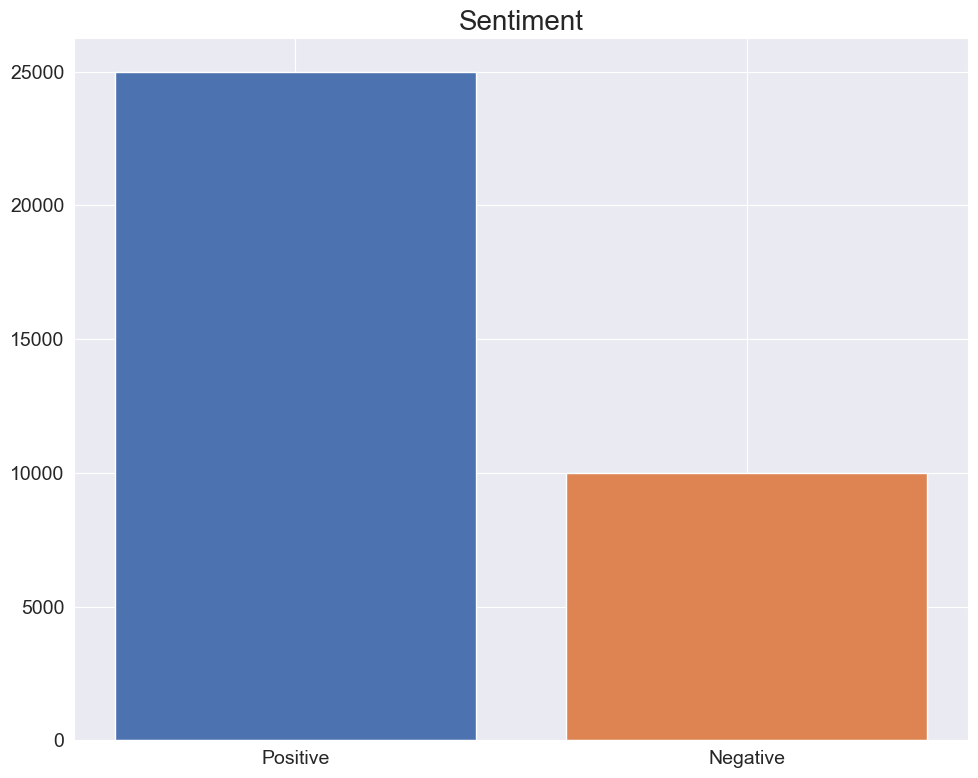

In [5]:
df_positive = df[df['sentiment']=='positive'][:40000]
df_negative = df[df['sentiment']=='negative'][:10000]

df = pd.concat([df_positive, df_negative])

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')
plt.rc('axes', titlesize=20)
plt.rc('axes', labelsize=16)
plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)
plt.rc('legend', fontsize=14)
plt.rc('font', size=14)

colors = sns.color_palette('deep')

plt.figure(figsize=(10,8), tight_layout=True)
plt.bar(x=['Positive', 'Negative'], height=df.value_counts(['sentiment']), color=colors[:2])
plt.title('Sentiment')
plt.savefig('sentiment.png')

plt.show()

In [6]:
#Balancing the data set

from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=0)
df_bal, df_bal['sentiment'] = rus.fit_resample(df[['review']], df['sentiment'])

df_bal

print(df.value_counts('sentiment'))
print('---------------')
print(df_bal.value_counts('sentiment'))

sentiment
positive    25000
negative    10000
Name: count, dtype: int64
---------------
sentiment
negative    10000
positive    10000
Name: count, dtype: int64


In [7]:
#Splitting the dataset into train and test data sets

from sklearn.model_selection import train_test_split

train, test = train_test_split(df_bal, test_size=0.33, random_state=42)

train_x, train_y = train['review'], train['sentiment']
test_x, test_y = test['review'], test['sentiment']

print(test_y)

159      positive
4032     negative
17115    negative
2256     negative
10534    positive
           ...   
10784    negative
1526     negative
1240     negative
42622    positive
36815    positive
Name: sentiment, Length: 6600, dtype: object


In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# Initialize the TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english')

# Fit and transform the training data
train_x_vector = tfidf.fit_transform(train_x)

# Transform the test data
test_x_vector = tfidf.transform(test_x)

# Create a sparse DataFrame from the TF-IDF matrix
pd.DataFrame.sparse.from_spmatrix(
    train_x_vector,
    index=train_x.index,
    columns=tfidf.get_feature_names_out()
)


,00,000,00001,001,006,007,00s,01,0148,02,...,époque,être,êxtase,ísnt,île,über,übermensch,überwoman,þór,żmijewski
13994,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
42720,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13265,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19739,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10395,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5295,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7289,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10787,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1739,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
#Support Vector Machine (SVM)

from sklearn.svm import SVC

svc = SVC(kernel='linear')
svc.fit(train_x_vector, train_y)

SVC(kernel='linear')

In [11]:
#Decision Tree

from sklearn.tree import DecisionTreeClassifier

dec_tree = DecisionTreeClassifier()
dec_tree.fit(train_x_vector, train_y)

DecisionTreeClassifier()

In [13]:
#Decision Tree

from sklearn.tree import DecisionTreeClassifier

dec_tree = DecisionTreeClassifier()
dec_tree.fit(train_x_vector, train_y)

DecisionTreeClassifier()